# Includes

In [ ]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Miscellaneous
from tqdm import tqdm
import os
import random

#Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Variables

In [ ]:
IMAGE_SIZE = 128
STANDART_MODEL_EPOCHS = 30
MODEL1_EPOCHS = STANDART_MODEL_EPOCHS
MODEL2_EPOCHS = STANDART_MODEL_EPOCHS
MODEL3_EPOCHS = STANDART_MODEL_EPOCHS


#Load dataset

In [ ]:
train_dir = '/content/drive/MyDrive/BIAI/dataset/cleaned/Testing'
test_dir = '/content/drive/MyDrive/BIAI/dataset/cleaned/Training'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+"//" +label):
        train_paths.append(train_dir + '//'+label+ '//'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

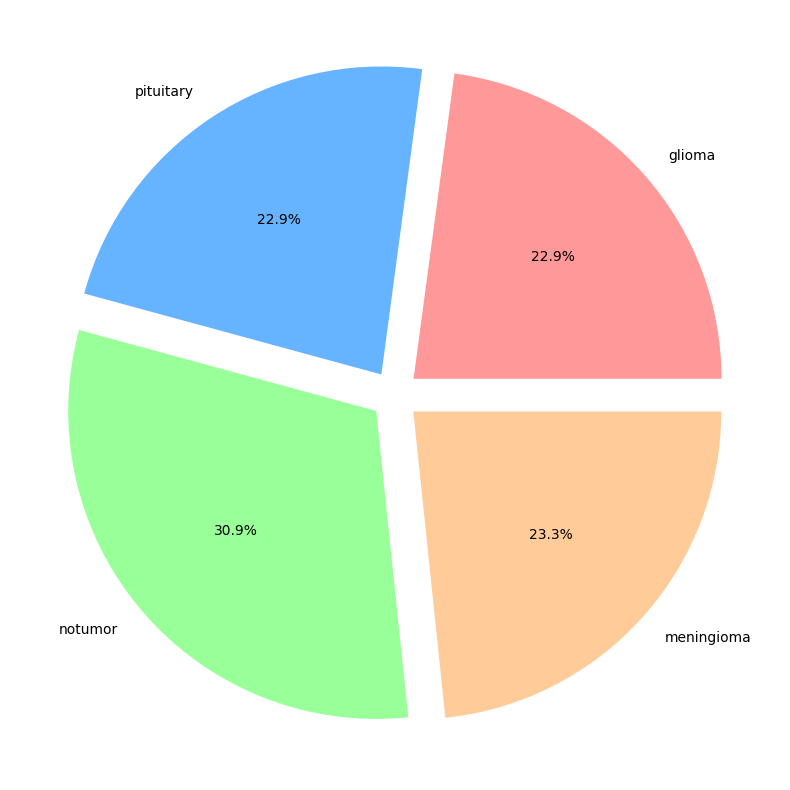

In [ ]:
plt.figure(figsize=(10,10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie([len(os.listdir(train_dir+"//" +label))
        for label in os.listdir(train_dir)],
         labels=os.listdir(train_dir),
          colors = colors,
           explode = (0.08,0.08,0.08,0.08)
           ,autopct='%1.1f%%')
plt.show()

In [ ]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+ '//' + label):
        test_paths.append(test_dir +'//'+label + '//'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

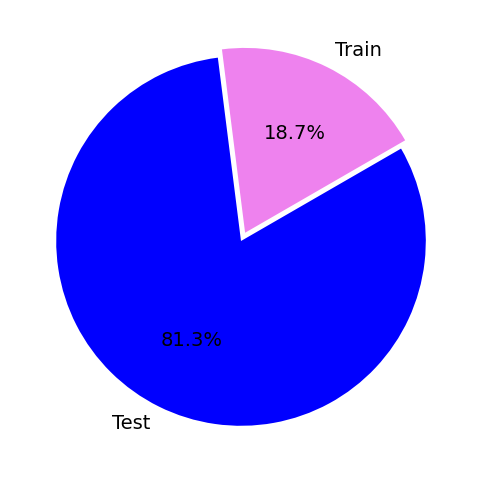

In [ ]:
plt.figure(figsize=(14,6))
colors = ['Violet' , 'Blue']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Sharpness(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

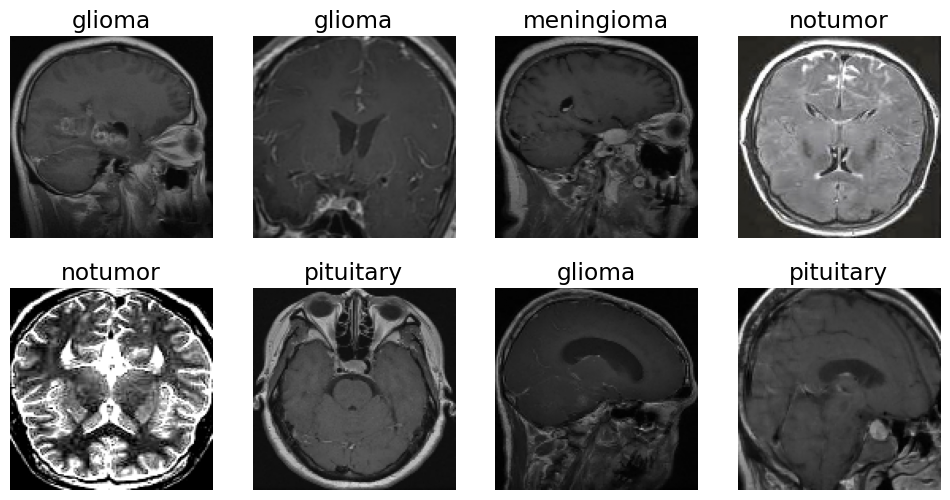

In [ ]:


def open_images(paths):

    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)


images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

In [ ]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

# **FIRST MODEL**

# Model building

In [ ]:
def build_model():
    model1 = Sequential()
    model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Conv2D(64, (3, 3), activation='relu'))
    model1.add(MaxPooling2D((2, 2)))
    model1.add(Conv2D(32, (3, 3), activation='relu'))
    model1.add(Flatten())
    model1.add(Dense(16, activation='relu'))
    model1.add(Dense(4, activation='softmax'))
    model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model1

model1 = build_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 25088)             0

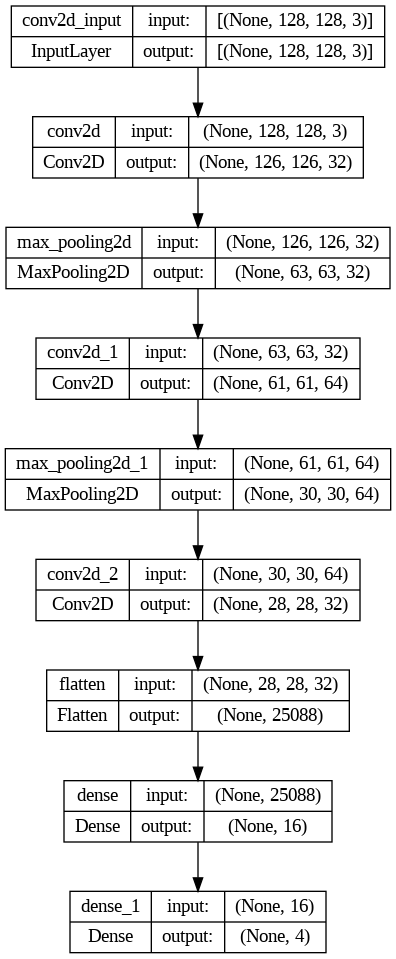

In [ ]:
keras.utils.plot_model(model1, show_shapes=True)

#First model learing

In [ ]:
history = model1.fit(datagen(train_paths, train_labels, batch_size=32, epochs=MODEL1_EPOCHS), steps_per_epoch=len(train_paths)//32, epochs=MODEL1_EPOCHS)

Epoch 1/30
40/40 [==============================] - 309s 8s/step - loss: 1.2048 - accuracy: 0.4406
Epoch 2/30
40/40 [==============================] - 52s 1s/step - loss: 0.8738 - accuracy: 0.6271
Epoch 3/30
40/40 [==============================] - 42s 1s/step - loss: 0.6812 - accuracy: 0.7162
Epoch 4/30
40/40 [==============================] - 44s 1s/step - loss: 0.5410 - accuracy: 0.7850
Epoch 5/30
40/40 [==============================] - 42s 1s/step - loss: 0.5052 - accuracy: 0.8053
Epoch 6/30
40/40 [==============================] - 43s 1s/step - loss: 0.3889 - accuracy: 0.8499
Epoch 7/30
40/40 [==============================] - 44s 1s/step - loss: 0.3349 - accuracy: 0.8749
Epoch 8/30
40/40 [==============================] - 42s 1s/step - loss: 0.3435 - accuracy: 0.8694
Epoch 9/30
40/40 [==============================] - 49s 1s/step - loss: 0.2863 - accuracy: 0.8858
Epoch 10/30
40/40 [==============================] - 45s 1s/step - loss: 0.2331 - accuracy: 0.9203
Epoch 11/30
40/40 

# First model results

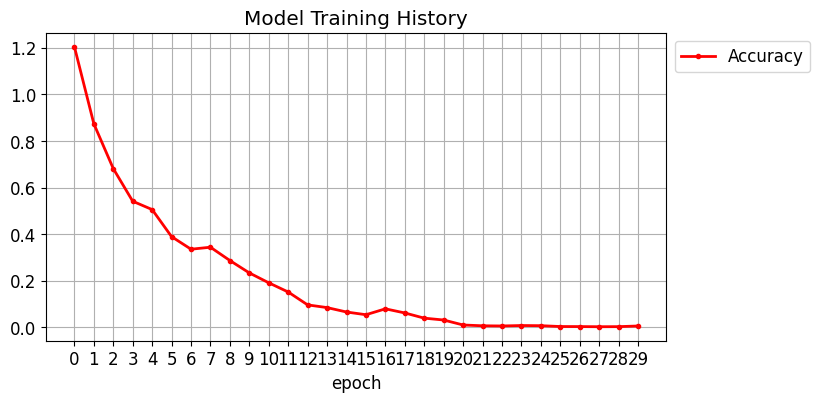

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
#plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(MODEL1_EPOCHS)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model1.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|          | 0/178 [00:00<?, ?it/s]

1/1 [==============================] - 0s 386ms/step


  1%|          | 1/178 [00:10<30:39, 10.39s/it]

1/1 [==============================] - 0s 214ms/step


  1%|          | 2/178 [00:20<30:44, 10.48s/it]

1/1 [==============================] - 0s 257ms/step


  2%|▏         | 3/178 [00:31<30:28, 10.45s/it]

1/1 [==============================] - 0s 354ms/step


  2%|▏         | 4/178 [00:42<31:06, 10.73s/it]

1/1 [==============================] - 0s 362ms/step


  3%|▎         | 5/178 [00:53<31:22, 10.88s/it]

1/1 [==============================] - 0s 226ms/step


  3%|▎         | 6/178 [01:04<30:56, 10.79s/it]

1/1 [==============================] - 0s 251ms/step


  4%|▍         | 7/178 [01:15<31:02, 10.89s/it]

1/1 [==============================] - 0s 225ms/step


  4%|▍         | 8/178 [01:26<31:06, 10.98s/it]

1/1 [==============================] - 0s 232ms/step


  5%|▌         | 9/178 [01:37<30:47, 10.93s/it]

1/1 [==============================] - 0s 219ms/step


  6%|▌         | 10/178 [01:48<30:47, 11.00s/it]

1/1 [==============================] - 0s 463ms/step


  6%|▌         | 11/178 [01:59<30:33, 10.98s/it]

1/1 [==============================] - 0s 306ms/step


  7%|▋         | 12/178 [02:10<30:04, 10.87s/it]

1/1 [==============================] - 0s 228ms/step


  7%|▋         | 13/178 [02:20<29:33, 10.75s/it]

1/1 [==============================] - 0s 241ms/step


  8%|▊         | 14/178 [02:30<29:08, 10.66s/it]

1/1 [==============================] - 0s 236ms/step


  8%|▊         | 15/178 [02:41<28:33, 10.51s/it]

1/1 [==============================] - 0s 258ms/step


  9%|▉         | 16/178 [02:51<28:34, 10.59s/it]

1/1 [==============================] - 0s 416ms/step


 10%|▉         | 17/178 [03:01<27:59, 10.43s/it]

1/1 [==============================] - 0s 251ms/step


 10%|█         | 18/178 [03:12<27:46, 10.41s/it]

1/1 [==============================] - 0s 220ms/step


 11%|█         | 19/178 [03:22<27:10, 10.26s/it]

1/1 [==============================] - 0s 242ms/step


 11%|█         | 20/178 [03:32<27:18, 10.37s/it]

1/1 [==============================] - 0s 222ms/step


 12%|█▏        | 21/178 [03:42<26:49, 10.25s/it]

1/1 [==============================] - 0s 460ms/step


 12%|█▏        | 22/178 [03:53<26:52, 10.34s/it]

1/1 [==============================] - 0s 493ms/step


 13%|█▎        | 23/178 [04:04<26:55, 10.42s/it]

1/1 [==============================] - 0s 270ms/step


 13%|█▎        | 24/178 [04:13<26:17, 10.24s/it]

1/1 [==============================] - 0s 238ms/step


 14%|█▍        | 25/178 [04:23<25:45, 10.10s/it]

1/1 [==============================] - 0s 430ms/step


 15%|█▍        | 26/178 [04:34<26:08, 10.32s/it]

1/1 [==============================] - 0s 373ms/step


 15%|█▌        | 27/178 [04:45<26:13, 10.42s/it]

1/1 [==============================] - 0s 231ms/step


 16%|█▌        | 28/178 [04:56<26:37, 10.65s/it]

1/1 [==============================] - 0s 236ms/step


 16%|█▋        | 29/178 [05:06<26:14, 10.57s/it]

1/1 [==============================] - 0s 230ms/step


 17%|█▋        | 30/178 [05:17<26:13, 10.63s/it]

1/1 [==============================] - 0s 257ms/step


 17%|█▋        | 31/178 [05:28<26:11, 10.69s/it]

1/1 [==============================] - 0s 292ms/step


 18%|█▊        | 32/178 [05:38<25:46, 10.59s/it]

1/1 [==============================] - 0s 231ms/step


 19%|█▊        | 33/178 [05:48<24:46, 10.25s/it]

1/1 [==============================] - 0s 240ms/step


 19%|█▉        | 34/178 [05:57<24:16, 10.12s/it]

1/1 [==============================] - 0s 236ms/step


 20%|█▉        | 35/178 [06:08<24:29, 10.28s/it]

1/1 [==============================] - 0s 225ms/step


 20%|██        | 36/178 [06:18<24:17, 10.27s/it]

1/1 [==============================] - 0s 339ms/step


 21%|██        | 37/178 [06:29<24:26, 10.40s/it]

1/1 [==============================] - 0s 373ms/step


 21%|██▏       | 38/178 [06:40<24:46, 10.62s/it]

1/1 [==============================] - 0s 238ms/step


 22%|██▏       | 39/178 [06:51<24:40, 10.65s/it]

1/1 [==============================] - 0s 238ms/step


 22%|██▏       | 40/178 [07:01<24:24, 10.61s/it]

1/1 [==============================] - 0s 238ms/step


 23%|██▎       | 41/178 [07:12<24:30, 10.73s/it]

1/1 [==============================] - 0s 231ms/step


 24%|██▎       | 42/178 [07:23<24:25, 10.78s/it]

1/1 [==============================] - 0s 258ms/step


 24%|██▍       | 43/178 [07:33<23:49, 10.59s/it]

1/1 [==============================] - 0s 406ms/step


 25%|██▍       | 44/178 [07:43<23:04, 10.33s/it]

1/1 [==============================] - 0s 242ms/step


 25%|██▌       | 45/178 [07:53<22:43, 10.25s/it]

1/1 [==============================] - 0s 263ms/step


 26%|██▌       | 46/178 [08:03<22:23, 10.18s/it]

1/1 [==============================] - 0s 229ms/step


 26%|██▋       | 47/178 [08:13<22:06, 10.12s/it]

1/1 [==============================] - 0s 403ms/step


 27%|██▋       | 48/178 [08:23<22:01, 10.16s/it]

1/1 [==============================] - 0s 218ms/step


 28%|██▊       | 49/178 [08:34<22:00, 10.24s/it]

1/1 [==============================] - 0s 221ms/step


 28%|██▊       | 50/178 [08:44<21:51, 10.25s/it]

1/1 [==============================] - 0s 217ms/step


 29%|██▊       | 51/178 [08:55<21:49, 10.31s/it]

1/1 [==============================] - 0s 215ms/step


 29%|██▉       | 52/178 [09:05<21:34, 10.27s/it]

1/1 [==============================] - 0s 373ms/step


 30%|██▉       | 53/178 [09:15<21:12, 10.18s/it]

1/1 [==============================] - 0s 349ms/step


 30%|███       | 54/178 [09:25<21:19, 10.32s/it]

1/1 [==============================] - 0s 222ms/step


 31%|███       | 55/178 [09:36<21:30, 10.49s/it]

1/1 [==============================] - 0s 218ms/step


 31%|███▏      | 56/178 [09:47<21:18, 10.48s/it]

1/1 [==============================] - 0s 228ms/step


 32%|███▏      | 57/178 [09:57<20:47, 10.31s/it]

1/1 [==============================] - 0s 215ms/step


 33%|███▎      | 58/178 [10:07<20:38, 10.32s/it]

1/1 [==============================] - 0s 416ms/step


 33%|███▎      | 59/178 [10:17<20:18, 10.24s/it]

1/1 [==============================] - 0s 238ms/step


 34%|███▎      | 60/178 [10:27<20:06, 10.22s/it]

1/1 [==============================] - 0s 243ms/step


 34%|███▍      | 61/178 [10:37<19:54, 10.21s/it]

1/1 [==============================] - 0s 217ms/step


 35%|███▍      | 62/178 [10:48<19:44, 10.21s/it]

1/1 [==============================] - 0s 234ms/step


 35%|███▌      | 63/178 [10:58<19:56, 10.41s/it]

1/1 [==============================] - 0s 409ms/step


 36%|███▌      | 64/178 [11:09<19:56, 10.49s/it]

1/1 [==============================] - 0s 224ms/step


 37%|███▋      | 65/178 [11:19<19:30, 10.36s/it]

1/1 [==============================] - 0s 246ms/step


 37%|███▋      | 66/178 [11:30<19:36, 10.51s/it]

1/1 [==============================] - 0s 232ms/step


 38%|███▊      | 67/178 [11:41<19:37, 10.61s/it]

1/1 [==============================] - 0s 235ms/step


 38%|███▊      | 68/178 [11:52<19:40, 10.73s/it]

1/1 [==============================] - 0s 222ms/step


 39%|███▉      | 69/178 [12:02<18:58, 10.45s/it]

1/1 [==============================] - 0s 382ms/step


 39%|███▉      | 70/178 [12:13<19:01, 10.57s/it]

1/1 [==============================] - 0s 217ms/step


 40%|███▉      | 71/178 [12:23<19:00, 10.66s/it]

1/1 [==============================] - 0s 226ms/step


 40%|████      | 72/178 [12:34<18:43, 10.60s/it]

1/1 [==============================] - 0s 252ms/step


 41%|████      | 73/178 [12:44<18:24, 10.52s/it]

1/1 [==============================] - 0s 229ms/step


 42%|████▏     | 74/178 [12:54<18:05, 10.44s/it]

1/1 [==============================] - 0s 363ms/step


 42%|████▏     | 75/178 [13:05<17:48, 10.37s/it]

1/1 [==============================] - 0s 234ms/step


 43%|████▎     | 76/178 [13:14<17:14, 10.14s/it]

1/1 [==============================] - 0s 234ms/step


 43%|████▎     | 77/178 [13:25<17:19, 10.30s/it]

1/1 [==============================] - 0s 226ms/step


 44%|████▍     | 78/178 [13:35<17:06, 10.26s/it]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 79/178 [13:45<16:42, 10.12s/it]

1/1 [==============================] - 0s 404ms/step


 45%|████▍     | 80/178 [13:55<16:41, 10.22s/it]

1/1 [==============================] - 0s 380ms/step


 46%|████▌     | 81/178 [14:06<16:50, 10.42s/it]

1/1 [==============================] - 0s 238ms/step


 46%|████▌     | 82/178 [14:16<16:22, 10.24s/it]

1/1 [==============================] - 0s 222ms/step


 47%|████▋     | 83/178 [14:26<15:56, 10.07s/it]

1/1 [==============================] - 0s 222ms/step


 47%|████▋     | 84/178 [14:36<15:49, 10.10s/it]

1/1 [==============================] - 0s 344ms/step


 48%|████▊     | 85/178 [14:46<15:42, 10.13s/it]

1/1 [==============================] - 0s 239ms/step


 48%|████▊     | 86/178 [14:56<15:27, 10.08s/it]

1/1 [==============================] - 0s 238ms/step


 49%|████▉     | 87/178 [15:06<14:59,  9.88s/it]

1/1 [==============================] - 0s 222ms/step


 49%|████▉     | 88/178 [15:15<14:36,  9.74s/it]

1/1 [==============================] - 0s 452ms/step


 50%|█████     | 89/178 [15:25<14:27,  9.74s/it]

1/1 [==============================] - 0s 242ms/step


 51%|█████     | 90/178 [15:35<14:26,  9.84s/it]

1/1 [==============================] - 0s 248ms/step


 51%|█████     | 91/178 [15:45<14:29, 10.00s/it]

1/1 [==============================] - 0s 219ms/step


 52%|█████▏    | 92/178 [15:55<14:09,  9.88s/it]

1/1 [==============================] - 0s 230ms/step


 52%|█████▏    | 93/178 [16:04<13:50,  9.77s/it]

1/1 [==============================] - 0s 234ms/step


 53%|█████▎    | 94/178 [16:13<13:21,  9.54s/it]

1/1 [==============================] - 0s 217ms/step


 53%|█████▎    | 95/178 [16:24<13:31,  9.78s/it]

1/1 [==============================] - 0s 213ms/step


 54%|█████▍    | 96/178 [16:33<13:15,  9.71s/it]

1/1 [==============================] - 0s 223ms/step


 54%|█████▍    | 97/178 [16:43<13:16,  9.83s/it]

1/1 [==============================] - 0s 449ms/step


 55%|█████▌    | 98/178 [16:54<13:21, 10.02s/it]

1/1 [==============================] - 0s 231ms/step


 56%|█████▌    | 99/178 [17:04<13:18, 10.10s/it]

1/1 [==============================] - 0s 236ms/step


 56%|█████▌    | 100/178 [17:15<13:20, 10.27s/it]

1/1 [==============================] - 0s 219ms/step


 57%|█████▋    | 101/178 [17:25<13:05, 10.21s/it]

1/1 [==============================] - 0s 236ms/step


 57%|█████▋    | 102/178 [17:34<12:37,  9.97s/it]

1/1 [==============================] - 0s 351ms/step


 58%|█████▊    | 103/178 [17:45<12:47, 10.24s/it]

1/1 [==============================] - 0s 253ms/step


 58%|█████▊    | 104/178 [17:55<12:38, 10.25s/it]

1/1 [==============================] - 0s 262ms/step


 59%|█████▉    | 105/178 [18:06<12:31, 10.29s/it]

1/1 [==============================] - 0s 220ms/step


 60%|█████▉    | 106/178 [18:16<12:15, 10.21s/it]

1/1 [==============================] - 0s 235ms/step


 60%|██████    | 107/178 [18:26<12:10, 10.28s/it]

1/1 [==============================] - 0s 485ms/step


 61%|██████    | 108/178 [18:37<12:05, 10.37s/it]

1/1 [==============================] - 0s 422ms/step


 61%|██████    | 109/178 [18:48<12:17, 10.69s/it]

1/1 [==============================] - 0s 219ms/step


 62%|██████▏   | 110/178 [18:59<12:01, 10.61s/it]

1/1 [==============================] - 0s 230ms/step


 62%|██████▏   | 111/178 [19:09<11:42, 10.49s/it]

1/1 [==============================] - 0s 223ms/step


 63%|██████▎   | 112/178 [19:19<11:32, 10.50s/it]

1/1 [==============================] - 0s 292ms/step


 63%|██████▎   | 113/178 [19:30<11:16, 10.41s/it]

1/1 [==============================] - 0s 395ms/step


 64%|██████▍   | 114/178 [19:41<11:22, 10.66s/it]

1/1 [==============================] - 0s 279ms/step


 65%|██████▍   | 115/178 [19:51<11:07, 10.60s/it]

1/1 [==============================] - 0s 257ms/step


 65%|██████▌   | 116/178 [20:01<10:34, 10.23s/it]

1/1 [==============================] - 0s 252ms/step


 66%|██████▌   | 117/178 [20:10<10:05,  9.92s/it]

1/1 [==============================] - 0s 232ms/step


 66%|██████▋   | 118/178 [20:20<10:00, 10.00s/it]

1/1 [==============================] - 0s 245ms/step


 67%|██████▋   | 119/178 [20:29<09:36,  9.77s/it]

1/1 [==============================] - 0s 218ms/step


 67%|██████▋   | 120/178 [20:40<09:47, 10.13s/it]

1/1 [==============================] - 0s 235ms/step


 68%|██████▊   | 121/178 [20:50<09:39, 10.16s/it]

1/1 [==============================] - 0s 232ms/step


 69%|██████▊   | 122/178 [21:01<09:36, 10.29s/it]

1/1 [==============================] - 0s 233ms/step


 69%|██████▉   | 123/178 [21:12<09:31, 10.39s/it]

1/1 [==============================] - 0s 409ms/step


 70%|██████▉   | 124/178 [21:22<09:17, 10.33s/it]

1/1 [==============================] - 0s 249ms/step


 70%|███████   | 125/178 [21:32<09:03, 10.25s/it]

1/1 [==============================] - 0s 236ms/step


 71%|███████   | 126/178 [21:41<08:41, 10.03s/it]

1/1 [==============================] - 0s 233ms/step


 71%|███████▏  | 127/178 [21:52<08:41, 10.22s/it]

1/1 [==============================] - 0s 258ms/step


 72%|███████▏  | 128/178 [22:02<08:31, 10.23s/it]

1/1 [==============================] - 0s 422ms/step


 72%|███████▏  | 129/178 [22:13<08:26, 10.33s/it]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 130/178 [22:23<08:10, 10.21s/it]

1/1 [==============================] - 0s 232ms/step


 74%|███████▎  | 131/178 [22:33<07:57, 10.17s/it]

1/1 [==============================] - 0s 233ms/step


 74%|███████▍  | 132/178 [22:43<07:47, 10.16s/it]

1/1 [==============================] - 0s 222ms/step


 75%|███████▍  | 133/178 [22:54<07:42, 10.29s/it]

1/1 [==============================] - 0s 408ms/step


 75%|███████▌  | 134/178 [23:04<07:29, 10.22s/it]

1/1 [==============================] - 0s 230ms/step


 76%|███████▌  | 135/178 [23:13<07:13, 10.09s/it]

1/1 [==============================] - 0s 221ms/step


 76%|███████▋  | 136/178 [23:24<07:03, 10.08s/it]

1/1 [==============================] - 0s 217ms/step


 77%|███████▋  | 137/178 [23:34<06:53, 10.08s/it]

1/1 [==============================] - 0s 287ms/step


 78%|███████▊  | 138/178 [23:44<06:48, 10.22s/it]

1/1 [==============================] - 0s 345ms/step


 78%|███████▊  | 139/178 [23:55<06:40, 10.27s/it]

1/1 [==============================] - 0s 235ms/step


 79%|███████▊  | 140/178 [24:05<06:31, 10.31s/it]

1/1 [==============================] - 0s 237ms/step


 79%|███████▉  | 141/178 [24:15<06:19, 10.26s/it]

1/1 [==============================] - 0s 227ms/step


 80%|███████▉  | 142/178 [24:26<06:12, 10.34s/it]

1/1 [==============================] - 0s 246ms/step


 80%|████████  | 143/178 [24:36<06:05, 10.44s/it]

1/1 [==============================] - 0s 441ms/step


 81%|████████  | 144/178 [24:47<05:55, 10.44s/it]

1/1 [==============================] - 0s 236ms/step


 81%|████████▏ | 145/178 [24:58<05:51, 10.65s/it]

1/1 [==============================] - 0s 238ms/step


 82%|████████▏ | 146/178 [25:08<05:38, 10.57s/it]

1/1 [==============================] - 0s 252ms/step


 83%|████████▎ | 147/178 [25:19<05:25, 10.51s/it]

1/1 [==============================] - 0s 260ms/step


 83%|████████▎ | 148/178 [25:29<05:16, 10.54s/it]

1/1 [==============================] - 0s 305ms/step


 84%|████████▎ | 149/178 [25:39<05:03, 10.46s/it]

1/1 [==============================] - 0s 457ms/step


 84%|████████▍ | 150/178 [25:50<04:57, 10.62s/it]

1/1 [==============================] - 0s 238ms/step


 85%|████████▍ | 151/178 [26:01<04:49, 10.71s/it]

1/1 [==============================] - 0s 225ms/step


 85%|████████▌ | 152/178 [26:12<04:41, 10.82s/it]

1/1 [==============================] - 0s 234ms/step


 86%|████████▌ | 153/178 [26:23<04:24, 10.58s/it]

1/1 [==============================] - 0s 247ms/step


 87%|████████▋ | 154/178 [26:33<04:10, 10.43s/it]

1/1 [==============================] - 0s 287ms/step


 87%|████████▋ | 155/178 [26:43<04:03, 10.57s/it]

1/1 [==============================] - 0s 362ms/step


 88%|████████▊ | 156/178 [26:54<03:53, 10.62s/it]

1/1 [==============================] - 0s 228ms/step


 88%|████████▊ | 157/178 [27:05<03:41, 10.55s/it]

1/1 [==============================] - 0s 235ms/step


 89%|████████▉ | 158/178 [27:15<03:31, 10.56s/it]

1/1 [==============================] - 0s 240ms/step


 89%|████████▉ | 159/178 [27:26<03:19, 10.49s/it]

1/1 [==============================] - 0s 237ms/step


 90%|████████▉ | 160/178 [27:36<03:10, 10.58s/it]

1/1 [==============================] - 0s 414ms/step


 90%|█████████ | 161/178 [27:46<02:56, 10.36s/it]

1/1 [==============================] - 0s 229ms/step


 91%|█████████ | 162/178 [27:56<02:43, 10.21s/it]

1/1 [==============================] - 0s 226ms/step


 92%|█████████▏| 163/178 [28:06<02:32, 10.16s/it]

1/1 [==============================] - 0s 231ms/step


 92%|█████████▏| 164/178 [28:16<02:20, 10.05s/it]

1/1 [==============================] - 0s 389ms/step


 93%|█████████▎| 165/178 [28:26<02:10, 10.04s/it]

1/1 [==============================] - 0s 217ms/step


 93%|█████████▎| 166/178 [28:36<02:00, 10.06s/it]

1/1 [==============================] - 0s 256ms/step


 94%|█████████▍| 167/178 [28:46<01:49,  9.97s/it]

1/1 [==============================] - 0s 223ms/step


 94%|█████████▍| 168/178 [28:55<01:38,  9.82s/it]

1/1 [==============================] - 0s 225ms/step


 95%|█████████▍| 169/178 [29:05<01:28,  9.87s/it]

1/1 [==============================] - 0s 262ms/step


 96%|█████████▌| 170/178 [29:15<01:18,  9.77s/it]

1/1 [==============================] - 0s 232ms/step


 96%|█████████▌| 171/178 [29:24<01:08,  9.76s/it]

1/1 [==============================] - 0s 217ms/step


 97%|█████████▋| 172/178 [29:35<00:59,  9.92s/it]

1/1 [==============================] - 0s 230ms/step


 97%|█████████▋| 173/178 [29:44<00:48,  9.75s/it]

1/1 [==============================] - 0s 380ms/step


 98%|█████████▊| 174/178 [29:54<00:39,  9.79s/it]

1/1 [==============================] - 0s 216ms/step


 98%|█████████▊| 175/178 [30:04<00:29,  9.85s/it]

1/1 [==============================] - 0s 231ms/step


 99%|█████████▉| 176/178 [30:14<00:19,  9.91s/it]

1/1 [==============================] - 0s 216ms/step


 99%|█████████▉| 177/178 [30:24<00:09,  9.89s/it]

1/1 [==============================] - 0s 446ms/step


100%|██████████| 178/178 [30:34<00:00, 10.04s/it]

1/1 [==============================] - 0s 204ms/step


179it [30:40, 10.28s/it]


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.66      0.67      0.67      1321
  meningioma       0.57      0.64      0.61      1339
     notumor       0.94      0.87      0.90      1595
   pituitary       0.79      0.76      0.77      1457

    accuracy                           0.74      5712
   macro avg       0.74      0.73      0.74      5712
weighted avg       0.75      0.74      0.75      5712



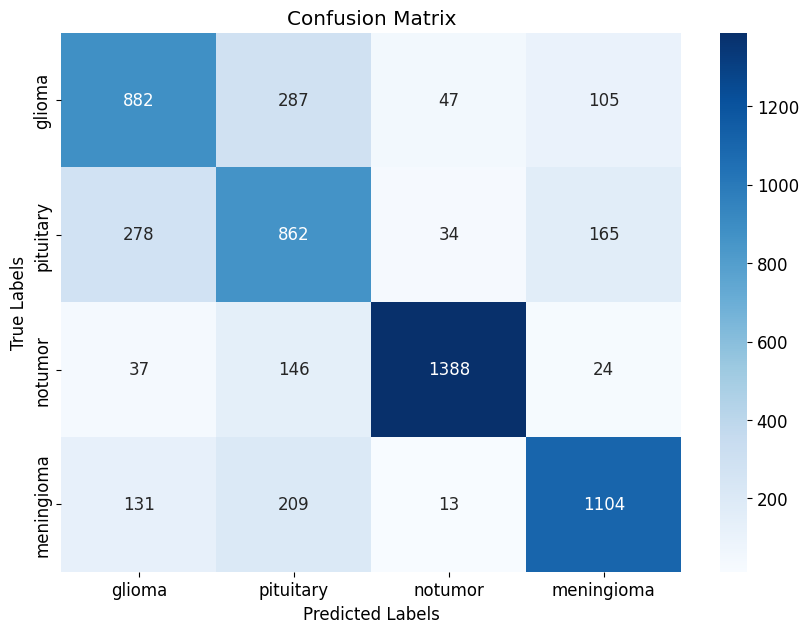

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, unique_labels)

# Second Model building
model - VGG16

In [ ]:
base_model2 = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')

for layer in base_model2.layers:
    layer.trainable = False

base_model2.layers[-2].trainable = True
base_model2.layers[-3].trainable = True
base_model2.layers[-4].trainable = True

model2 = Sequential()
model2.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model2.add(base_model2)
model2.add(Flatten())
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(len(unique_labels), activation='softmax'))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 15763908 (60.13 MB)
Trainable params: 81

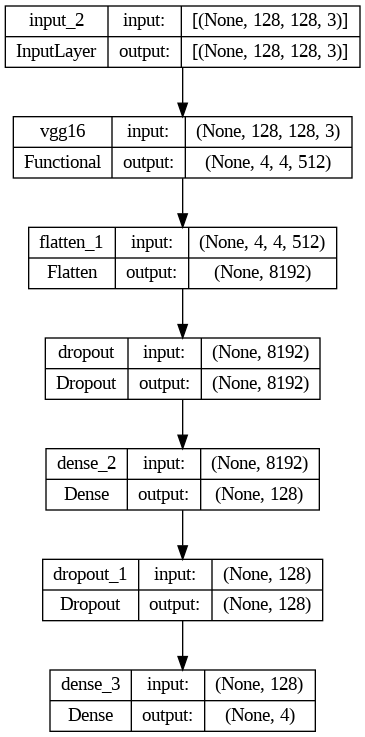

In [ ]:
keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

# Second model Training

In [ ]:
batch_size = 20
steps = int(len(train_paths)/batch_size)

history = model2.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=MODEL2_EPOCHS),
                    epochs=MODEL2_EPOCHS, steps_per_epoch=steps)

Epoch 1/30
65/65 [==============================] - 343s 5s/step - loss: 0.8635 - sparse_categorical_accuracy: 0.6331
Epoch 2/30
65/65 [==============================] - 336s 5s/step - loss: 0.5616 - sparse_categorical_accuracy: 0.7707
Epoch 3/30
65/65 [==============================] - 339s 5s/step - loss: 0.4357 - sparse_categorical_accuracy: 0.8389
Epoch 4/30
65/65 [==============================] - 337s 5s/step - loss: 0.3026 - sparse_categorical_accuracy: 0.8916
Epoch 5/30
65/65 [==============================] - 338s 5s/step - loss: 0.2321 - sparse_categorical_accuracy: 0.9140
Epoch 6/30
65/65 [==============================] - 337s 5s/step - loss: 0.1688 - sparse_categorical_accuracy: 0.9388
Epoch 7/30
65/65 [==============================] - 341s 5s/step - loss: 0.1130 - sparse_categorical_accuracy: 0.9520
Epoch 8/30
65/65 [==============================] - 337s 5s/step - loss: 0.0965 - sparse_categorical_accuracy: 0.9667
Epoch 9/30
65/65 [==============================] - 338s

# Second model results

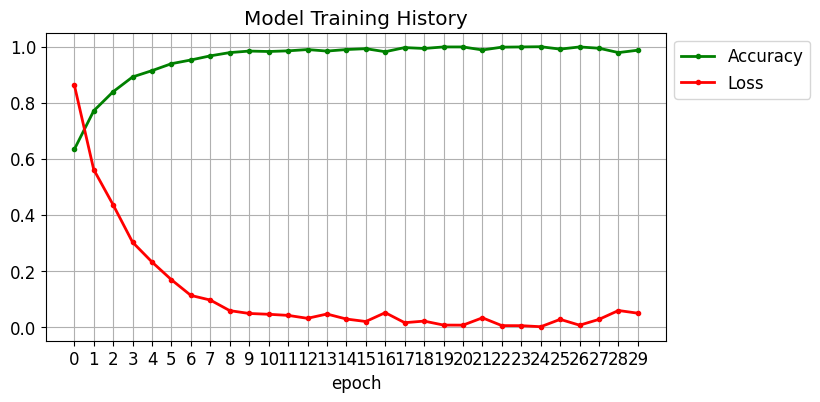

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(MODEL2_EPOCHS)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model2.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|          | 0/178 [00:00<?, ?it/s]

1/1 [==============================] - 7s 7s/step


  1%|          | 1/178 [00:07<20:52,  7.08s/it]

1/1 [==============================] - 6s 6s/step


  1%|          | 2/178 [00:17<26:51,  9.16s/it]

1/1 [==============================] - 6s 6s/step


  2%|▏         | 3/178 [00:23<22:27,  7.70s/it]

1/1 [==============================] - 8s 8s/step


  2%|▏         | 4/178 [00:32<23:17,  8.03s/it]

1/1 [==============================] - 6s 6s/step


  3%|▎         | 5/178 [00:38<21:05,  7.32s/it]

1/1 [==============================] - 7s 7s/step


  3%|▎         | 6/178 [00:48<24:08,  8.42s/it]

1/1 [==============================] - 6s 6s/step


  4%|▍         | 7/178 [00:54<21:38,  7.59s/it]

1/1 [==============================] - 8s 8s/step


  4%|▍         | 8/178 [01:03<22:24,  7.91s/it]

1/1 [==============================] - 6s 6s/step


  5%|▌         | 9/178 [01:09<20:34,  7.31s/it]

1/1 [==============================] - 7s 7s/step


  6%|▌         | 10/178 [01:17<20:51,  7.45s/it]

1/1 [==============================] - 6s 6s/step


  6%|▌         | 11/178 [01:23<19:35,  7.04s/it]

1/1 [==============================] - 7s 7s/step


  7%|▋         | 12/178 [01:29<19:16,  6.97s/it]

1/1 [==============================] - 7s 7s/step


  7%|▋         | 13/178 [01:37<19:35,  7.12s/it]

1/1 [==============================] - 6s 6s/step


  8%|▊         | 14/178 [01:43<18:35,  6.80s/it]

1/1 [==============================] - 8s 8s/step


  8%|▊         | 15/178 [01:54<21:36,  7.96s/it]

1/1 [==============================] - 6s 6s/step


  9%|▉         | 16/178 [02:00<20:11,  7.48s/it]

1/1 [==============================] - 8s 8s/step


 10%|▉         | 17/178 [02:08<20:28,  7.63s/it]

1/1 [==============================] - 6s 6s/step


 10%|█         | 18/178 [02:14<19:06,  7.17s/it]

1/1 [==============================] - 8s 8s/step


 11%|█         | 19/178 [02:23<20:03,  7.57s/it]

1/1 [==============================] - 6s 6s/step


 11%|█         | 20/178 [02:29<18:45,  7.13s/it]

1/1 [==============================] - 8s 8s/step


 12%|█▏        | 21/178 [02:39<21:19,  8.15s/it]

1/1 [==============================] - 6s 6s/step


 12%|█▏        | 22/178 [02:50<23:03,  8.87s/it]

1/1 [==============================] - 6s 6s/step


 13%|█▎        | 23/178 [02:56<20:41,  8.01s/it]

1/1 [==============================] - 7s 7s/step


 13%|█▎        | 24/178 [03:06<22:31,  8.78s/it]

1/1 [==============================] - 6s 6s/step


 14%|█▍        | 25/178 [03:12<20:14,  7.94s/it]

1/1 [==============================] - 8s 8s/step


 15%|█▍        | 26/178 [03:21<20:38,  8.15s/it]

1/1 [==============================] - 6s 6s/step


 15%|█▌        | 27/178 [03:27<18:55,  7.52s/it]

1/1 [==============================] - 7s 7s/step


 16%|█▌        | 28/178 [03:38<21:04,  8.43s/it]

1/1 [==============================] - 6s 6s/step


 16%|█▋        | 29/178 [03:43<19:05,  7.69s/it]

1/1 [==============================] - 8s 8s/step


 17%|█▋        | 30/178 [03:52<19:31,  7.92s/it]

1/1 [==============================] - 6s 6s/step


 17%|█▋        | 31/178 [03:58<17:56,  7.33s/it]

1/1 [==============================] - 7s 7s/step


 18%|█▊        | 32/178 [04:06<18:03,  7.42s/it]

1/1 [==============================] - 6s 6s/step


 19%|█▊        | 33/178 [04:12<17:03,  7.06s/it]

1/1 [==============================] - 6s 6s/step


 19%|█▉        | 34/178 [04:18<16:42,  6.97s/it]

1/1 [==============================] - 7s 7s/step


 20%|█▉        | 35/178 [04:26<16:59,  7.13s/it]

1/1 [==============================] - 6s 6s/step


 20%|██        | 36/178 [04:32<16:07,  6.81s/it]

1/1 [==============================] - 8s 8s/step


 21%|██        | 37/178 [04:41<17:09,  7.30s/it]

1/1 [==============================] - 6s 6s/step


 21%|██▏       | 38/178 [04:47<16:09,  6.93s/it]

1/1 [==============================] - 8s 8s/step


 22%|██▏       | 39/178 [04:55<17:04,  7.37s/it]

1/1 [==============================] - 6s 6s/step


 22%|██▏       | 40/178 [05:01<15:59,  6.95s/it]

1/1 [==============================] - 7s 7s/step


 23%|██▎       | 41/178 [05:12<18:20,  8.03s/it]

1/1 [==============================] - 6s 6s/step


 24%|██▎       | 42/178 [05:17<16:47,  7.41s/it]

1/1 [==============================] - 8s 8s/step


 24%|██▍       | 43/178 [05:28<18:44,  8.33s/it]

1/1 [==============================] - 6s 6s/step


 25%|██▍       | 44/178 [05:34<17:05,  7.65s/it]

1/1 [==============================] - 8s 8s/step


 25%|██▌       | 45/178 [05:42<17:29,  7.89s/it]

1/1 [==============================] - 6s 6s/step


 26%|██▌       | 46/178 [05:48<16:07,  7.33s/it]

1/1 [==============================] - 8s 8s/step


 26%|██▋       | 47/178 [05:59<18:05,  8.29s/it]

1/1 [==============================] - 6s 6s/step


 27%|██▋       | 48/178 [06:05<16:26,  7.59s/it]

1/1 [==============================] - 8s 8s/step


 28%|██▊       | 49/178 [06:13<16:42,  7.77s/it]

1/1 [==============================] - 6s 6s/step


 28%|██▊       | 50/178 [06:19<15:26,  7.23s/it]

1/1 [==============================] - 7s 7s/step


 29%|██▊       | 51/178 [06:30<17:26,  8.24s/it]

1/1 [==============================] - 6s 6s/step


 29%|██▉       | 52/178 [06:36<15:47,  7.52s/it]

1/1 [==============================] - 8s 8s/step


 30%|██▉       | 53/178 [06:46<17:34,  8.44s/it]

1/1 [==============================] - 6s 6s/step


 30%|███       | 54/178 [06:52<15:52,  7.68s/it]

1/1 [==============================] - 8s 8s/step


 31%|███       | 55/178 [07:01<16:17,  7.95s/it]

1/1 [==============================] - 6s 6s/step


 31%|███▏      | 56/178 [07:07<14:58,  7.37s/it]

1/1 [==============================] - 7s 7s/step


 32%|███▏      | 57/178 [07:17<16:47,  8.32s/it]

1/1 [==============================] - 6s 6s/step


 33%|███▎      | 58/178 [07:28<17:59,  8.99s/it]

1/1 [==============================] - 6s 6s/step


 33%|███▎      | 59/178 [07:34<16:04,  8.10s/it]

1/1 [==============================] - 7s 7s/step


 34%|███▎      | 60/178 [07:44<17:23,  8.84s/it]

1/1 [==============================] - 6s 6s/step


 34%|███▍      | 61/178 [07:50<15:32,  7.97s/it]

1/1 [==============================] - 8s 8s/step


 35%|███▍      | 62/178 [07:58<15:32,  8.04s/it]

1/1 [==============================] - 6s 6s/step


 35%|███▌      | 63/178 [08:05<14:15,  7.44s/it]

1/1 [==============================] - 7s 7s/step


 36%|███▌      | 64/178 [08:15<15:55,  8.38s/it]

1/1 [==============================] - 6s 6s/step


 37%|███▋      | 65/178 [08:21<14:24,  7.65s/it]

1/1 [==============================] - 8s 8s/step


 37%|███▋      | 66/178 [08:30<14:47,  7.92s/it]

1/1 [==============================] - 6s 6s/step


 38%|███▊      | 67/178 [08:36<13:35,  7.34s/it]

1/1 [==============================] - 7s 7s/step


 38%|███▊      | 68/178 [08:43<13:37,  7.44s/it]

1/1 [==============================] - 6s 6s/step


 39%|███▉      | 69/178 [08:50<13:11,  7.26s/it]

1/1 [==============================] - 6s 6s/step


 39%|███▉      | 70/178 [08:57<12:41,  7.05s/it]

1/1 [==============================] - 7s 7s/step


 40%|███▉      | 71/178 [09:04<12:52,  7.22s/it]

1/1 [==============================] - 6s 6s/step


 40%|████      | 72/178 [09:10<12:08,  6.87s/it]

1/1 [==============================] - 8s 8s/step


 41%|████      | 73/178 [09:19<12:55,  7.39s/it]

1/1 [==============================] - 6s 6s/step


 42%|████▏     | 74/178 [09:25<12:04,  6.96s/it]

1/1 [==============================] - 8s 8s/step


 42%|████▏     | 75/178 [09:35<13:49,  8.06s/it]

1/1 [==============================] - 6s 6s/step


 43%|████▎     | 76/178 [09:42<12:38,  7.44s/it]

1/1 [==============================] - 8s 8s/step


 43%|████▎     | 77/178 [09:50<12:54,  7.67s/it]

1/1 [==============================] - 6s 6s/step


 44%|████▍     | 78/178 [09:56<11:58,  7.19s/it]

1/1 [==============================] - 8s 8s/step


 44%|████▍     | 79/178 [10:06<13:31,  8.20s/it]

1/1 [==============================] - 6s 6s/step


 45%|████▍     | 80/178 [10:12<12:17,  7.52s/it]

1/1 [==============================] - 8s 8s/step


 46%|████▌     | 81/178 [10:20<12:29,  7.73s/it]

1/1 [==============================] - 6s 6s/step


 46%|████▌     | 82/178 [10:26<11:30,  7.19s/it]

1/1 [==============================] - 7s 7s/step


 47%|████▋     | 83/178 [10:34<11:33,  7.30s/it]

1/1 [==============================] - 6s 6s/step


 47%|████▋     | 84/178 [10:41<11:13,  7.17s/it]

1/1 [==============================] - 6s 6s/step


 48%|████▊     | 85/178 [10:51<12:40,  8.18s/it]

1/1 [==============================] - 6s 6s/step


 48%|████▊     | 86/178 [10:57<11:32,  7.52s/it]

1/1 [==============================] - 8s 8s/step


 49%|████▉     | 87/178 [11:06<11:46,  7.77s/it]

1/1 [==============================] - 6s 6s/step


 49%|████▉     | 88/178 [11:12<10:53,  7.26s/it]

1/1 [==============================] - 7s 7s/step


 50%|█████     | 89/178 [11:19<10:55,  7.37s/it]

1/1 [==============================] - 6s 6s/step


 51%|█████     | 90/178 [11:26<10:32,  7.19s/it]

1/1 [==============================] - 6s 6s/step


 51%|█████     | 91/178 [11:33<10:15,  7.08s/it]

1/1 [==============================] - 7s 7s/step


 52%|█████▏    | 92/178 [11:41<10:26,  7.28s/it]

1/1 [==============================] - 6s 6s/step


 52%|█████▏    | 93/178 [11:47<09:47,  6.92s/it]

1/1 [==============================] - 8s 8s/step


 53%|█████▎    | 94/178 [11:55<10:21,  7.40s/it]

1/1 [==============================] - 6s 6s/step


 53%|█████▎    | 95/178 [12:06<11:33,  8.36s/it]

1/1 [==============================] - 6s 6s/step


 54%|█████▍    | 96/178 [12:12<10:26,  7.65s/it]

1/1 [==============================] - 7s 7s/step


 54%|█████▍    | 97/178 [12:19<10:11,  7.55s/it]

1/1 [==============================] - 6s 6s/step


 55%|█████▌    | 98/178 [12:26<09:44,  7.30s/it]

1/1 [==============================] - 6s 6s/step


 56%|█████▌    | 99/178 [12:32<09:15,  7.03s/it]

1/1 [==============================] - 8s 8s/step


 56%|█████▌    | 100/178 [12:40<09:29,  7.30s/it]

1/1 [==============================] - 6s 6s/step


 57%|█████▋    | 101/178 [12:46<08:52,  6.91s/it]

1/1 [==============================] - 8s 8s/step


 57%|█████▋    | 102/178 [12:55<09:22,  7.40s/it]

1/1 [==============================] - 6s 6s/step


 58%|█████▊    | 103/178 [13:01<08:40,  6.95s/it]

1/1 [==============================] - 8s 8s/step


 58%|█████▊    | 104/178 [13:09<09:13,  7.48s/it]

1/1 [==============================] - 6s 6s/step


 59%|█████▉    | 105/178 [13:16<08:39,  7.12s/it]

1/1 [==============================] - 7s 7s/step


 60%|█████▉    | 106/178 [13:23<08:41,  7.24s/it]

1/1 [==============================] - 7s 7s/step


 60%|██████    | 107/178 [13:30<08:28,  7.16s/it]

1/1 [==============================] - 7s 7s/step


 61%|██████    | 108/178 [13:41<09:32,  8.18s/it]

1/1 [==============================] - 6s 6s/step


 61%|██████    | 109/178 [13:47<08:39,  7.54s/it]

1/1 [==============================] - 8s 8s/step


 62%|██████▏   | 110/178 [13:57<09:32,  8.42s/it]

1/1 [==============================] - 6s 6s/step


 62%|██████▏   | 111/178 [14:08<10:07,  9.06s/it]

1/1 [==============================] - 6s 6s/step


 63%|██████▎   | 112/178 [14:14<08:56,  8.13s/it]

1/1 [==============================] - 7s 7s/step


 63%|██████▎   | 113/178 [14:24<09:35,  8.85s/it]

1/1 [==============================] - 6s 6s/step


 64%|██████▍   | 114/178 [14:30<08:31,  8.00s/it]

1/1 [==============================] - 8s 8s/step


 65%|██████▍   | 115/178 [14:41<09:12,  8.77s/it]

1/1 [==============================] - 6s 6s/step


 65%|██████▌   | 116/178 [14:47<08:10,  7.91s/it]

1/1 [==============================] - 8s 8s/step


 66%|██████▌   | 117/178 [14:55<08:14,  8.11s/it]

1/1 [==============================] - 6s 6s/step


 66%|██████▋   | 118/178 [15:01<07:29,  7.49s/it]

1/1 [==============================] - 8s 8s/step


 67%|██████▋   | 119/178 [15:12<08:16,  8.42s/it]

1/1 [==============================] - 6s 6s/step


 67%|██████▋   | 120/178 [15:18<07:24,  7.67s/it]

1/1 [==============================] - 8s 8s/step


 68%|██████▊   | 121/178 [15:26<07:31,  7.92s/it]

1/1 [==============================] - 6s 6s/step


 69%|██████▊   | 122/178 [15:33<06:52,  7.37s/it]

1/1 [==============================] - 7s 7s/step


 69%|██████▉   | 123/178 [15:40<06:46,  7.39s/it]

1/1 [==============================] - 7s 7s/step


 70%|██████▉   | 124/178 [15:47<06:32,  7.27s/it]

1/1 [==============================] - 6s 6s/step


 70%|███████   | 125/178 [15:53<06:10,  6.98s/it]

1/1 [==============================] - 8s 8s/step


 71%|███████   | 126/178 [16:04<06:59,  8.07s/it]

1/1 [==============================] - 7s 7s/step


 71%|███████▏  | 127/178 [16:11<06:36,  7.78s/it]

1/1 [==============================] - 7s 7s/step


 72%|███████▏  | 128/178 [16:18<06:23,  7.66s/it]

1/1 [==============================] - 6s 6s/step


 72%|███████▏  | 129/178 [16:24<05:49,  7.14s/it]

1/1 [==============================] - 8s 8s/step


 73%|███████▎  | 130/178 [16:35<06:33,  8.19s/it]

1/1 [==============================] - 6s 6s/step


 74%|███████▎  | 131/178 [16:45<06:58,  8.90s/it]

1/1 [==============================] - 6s 6s/step


 74%|███████▍  | 132/178 [16:52<06:09,  8.04s/it]

1/1 [==============================] - 8s 8s/step


 75%|███████▍  | 133/178 [17:00<06:09,  8.22s/it]

1/1 [==============================] - 6s 6s/step


 75%|███████▌  | 134/178 [17:06<05:32,  7.55s/it]

1/1 [==============================] - 7s 7s/step


 76%|███████▌  | 135/178 [17:17<06:04,  8.47s/it]

1/1 [==============================] - 6s 6s/step


 76%|███████▋  | 136/178 [17:23<05:22,  7.69s/it]

1/1 [==============================] - 8s 8s/step


 77%|███████▋  | 137/178 [17:31<05:26,  7.97s/it]

1/1 [==============================] - 6s 6s/step


 78%|███████▊  | 138/178 [17:37<04:55,  7.38s/it]

1/1 [==============================] - 7s 7s/step


 78%|███████▊  | 139/178 [17:45<04:48,  7.40s/it]

1/1 [==============================] - 7s 7s/step


 79%|███████▊  | 140/178 [17:52<04:35,  7.25s/it]

1/1 [==============================] - 6s 6s/step


 79%|███████▉  | 141/178 [18:02<05:04,  8.24s/it]

1/1 [==============================] - 6s 6s/step


 80%|███████▉  | 142/178 [18:13<05:21,  8.92s/it]

1/1 [==============================] - 6s 6s/step


 80%|████████  | 143/178 [18:19<04:40,  8.01s/it]

1/1 [==============================] - 7s 7s/step


 81%|████████  | 144/178 [18:29<04:58,  8.78s/it]

1/1 [==============================] - 6s 6s/step


 81%|████████▏ | 145/178 [18:35<04:22,  7.96s/it]

1/1 [==============================] - 8s 8s/step


 82%|████████▏ | 146/178 [18:44<04:22,  8.20s/it]

1/1 [==============================] - 6s 6s/step


 83%|████████▎ | 147/178 [18:54<04:35,  8.90s/it]

1/1 [==============================] - 7s 7s/step


 83%|████████▎ | 148/178 [19:02<04:10,  8.37s/it]

1/1 [==============================] - 6s 6s/step


 84%|████████▎ | 149/178 [19:08<03:47,  7.85s/it]

1/1 [==============================] - 8s 8s/step


 84%|████████▍ | 150/178 [19:19<04:03,  8.69s/it]

1/1 [==============================] - 7s 7s/step


 85%|████████▍ | 151/178 [19:29<04:09,  9.23s/it]

1/1 [==============================] - 6s 6s/step


 85%|████████▌ | 152/178 [19:40<04:10,  9.63s/it]

1/1 [==============================] - 6s 6s/step


 86%|████████▌ | 153/178 [19:46<03:32,  8.52s/it]

1/1 [==============================] - 7s 7s/step


 87%|████████▋ | 154/178 [19:56<03:38,  9.12s/it]

1/1 [==============================] - 6s 6s/step


 87%|████████▋ | 155/178 [20:02<03:08,  8.21s/it]

1/1 [==============================] - 8s 8s/step


 88%|████████▊ | 156/178 [20:13<03:15,  8.91s/it]

1/1 [==============================] - 6s 6s/step


 88%|████████▊ | 157/178 [20:24<03:17,  9.41s/it]

1/1 [==============================] - 6s 6s/step


 89%|████████▉ | 158/178 [20:30<02:47,  8.38s/it]

1/1 [==============================] - 8s 8s/step


 89%|████████▉ | 159/178 [20:40<02:51,  9.03s/it]

1/1 [==============================] - 6s 6s/step


 90%|████████▉ | 160/178 [20:46<02:25,  8.11s/it]

1/1 [==============================] - 8s 8s/step


 90%|█████████ | 161/178 [20:55<02:19,  8.21s/it]

1/1 [==============================] - 6s 6s/step


 91%|█████████ | 162/178 [21:00<02:00,  7.54s/it]

1/1 [==============================] - 7s 7s/step


 92%|█████████▏| 163/178 [21:11<02:06,  8.44s/it]

1/1 [==============================] - 6s 6s/step


 92%|█████████▏| 164/178 [21:17<01:47,  7.70s/it]

1/1 [==============================] - 8s 8s/step


 93%|█████████▎| 165/178 [21:25<01:42,  7.90s/it]

1/1 [==============================] - 6s 6s/step


 93%|█████████▎| 166/178 [21:31<01:28,  7.36s/it]

1/1 [==============================] - 8s 8s/step


 94%|█████████▍| 167/178 [21:42<01:31,  8.32s/it]

1/1 [==============================] - 6s 6s/step


 94%|█████████▍| 168/178 [21:48<01:15,  7.59s/it]

1/1 [==============================] - 8s 8s/step


 95%|█████████▍| 169/178 [21:58<01:16,  8.46s/it]

1/1 [==============================] - 6s 6s/step


 96%|█████████▌| 170/178 [22:04<01:01,  7.74s/it]

1/1 [==============================] - 8s 8s/step


 96%|█████████▌| 171/178 [22:13<00:55,  7.91s/it]

1/1 [==============================] - 6s 6s/step


 97%|█████████▋| 172/178 [22:19<00:44,  7.35s/it]

1/1 [==============================] - 8s 8s/step


 97%|█████████▋| 173/178 [22:29<00:41,  8.31s/it]

1/1 [==============================] - 6s 6s/step


 98%|█████████▊| 174/178 [22:35<00:30,  7.64s/it]

1/1 [==============================] - 8s 8s/step


 98%|█████████▊| 175/178 [22:44<00:23,  7.90s/it]

1/1 [==============================] - 6s 6s/step


 99%|█████████▉| 176/178 [22:50<00:14,  7.33s/it]

1/1 [==============================] - 7s 7s/step


 99%|█████████▉| 177/178 [23:00<00:08,  8.29s/it]

1/1 [==============================] - 6s 6s/step


100%|██████████| 178/178 [23:11<00:00,  8.95s/it]

1/1 [==============================] - 3s 3s/step


179it [23:16,  7.80s/it]


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.80      0.94      0.87      1321
  meningioma       0.92      0.61      0.74      1339
     notumor       0.95      0.93      0.94      1595
   pituitary       0.82      0.96      0.89      1457

    accuracy                           0.87      5712
   macro avg       0.87      0.86      0.86      5712
weighted avg       0.88      0.87      0.86      5712



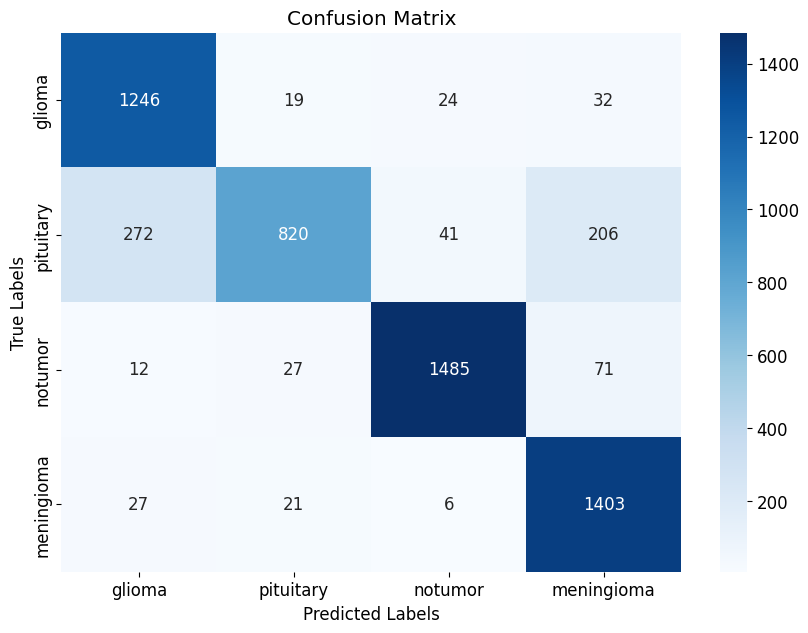

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, unique_labels)

# Inception3 model building

In [ ]:

base_model3 = InceptionV3(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')

for layer in base_model3.layers:
    layer.trainable = False

base_model3.layers[-2].trainable = True
base_model3.layers[-3].trainable = True
base_model3.layers[-4].trainable = True
base_model3.layers[-5].trainable = True

model3 = Sequential()
model3.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model3.add(base_model3)
model3.add(Flatten())
model3.add(Dropout(0.3))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(len(unique_labels), activation='softmax'))

model3.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_2 (Dropout)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                       

In [ ]:
keras.utils.plot_model(model3, show_shapes=True)

model3.compile(optimizer=Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

# Model 3 learining

In [ ]:
batch_size = 20
steps = int(len(train_paths)/batch_size)

history = model3.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=MODEL3_EPOCHS),
                    epochs=MODEL3_EPOCHS, steps_per_epoch=steps)

#Model 3 results

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(MODEL3_EPOCHS)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Evaluate model with test data
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model1.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

In [ ]:
print(classification_report(y_true, y_pred))

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(conf_matrix, unique_labels)

#Save all models

In [ ]:
model1.save('/content/drive/MyDrive/BIAI/model_guz_mozgu_1_flex.h5')

In [ ]:
model2.save('/content/drive/MyDrive/BIAI/model_guz_mozgu_2_vgg16.h5')

In [ ]:
model3.save('/content/drive/MyDrive/BIAI/model_guz_mozgu_3_inceptionv3.h5')